# Assignment 3 - 3351

## Product Recommendation System

In this assignment, we will be developing a personalized product recommendation system. The system will recommend products to users based on their previous purchases.

The recommendations will be generated using the purchase history data provided in the 'grocery_sells.csv' file. The goal is to create a model that can accurately predict and recommend products that a user is likely to purchase, enhancing the user experience and potentially increasing sales.

The main steps we will follow are:

1. Data Loading and Preprocessing: Load the data from 'grocery_sells.csv' and preprocess it for the recommendation system.

2. Model Building: Build a recommendation system model using an appropriate algorithm.

3. Model Training: Train the model using the preprocessed data.

4. Evaluation: Evaluate the performance of the model.

5. Product Recommendation: Use the trained model to recommend products to users based on their purchase history.

## Step 1: Importing the libraries

1. **TensorFlow**: TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It includes `keras`, a high-level API for building and training deep learning models.

2. **Scikit-learn (sklearn)**: Scikit-learn is a free software machine learning library for Python. It features various classification, regression, and clustering algorithms, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

3. **Pandas**: Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

4. **Matplotlib**: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

5. **Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

6. **Requests and StringIO**: Requests is a Python module used for making various types of HTTP requests like GET and POST. StringIO is a module that provides a convenient means of working with text I/O in memory.

The code also checks the version of TensorFlow, sklearn, pandas, numpy, and matplotlib using the `__version__` attribute. It also checks if a GPU is available for TensorFlow to use, which can significantly speed up training deep learning models.

In [ ]:
# importing all Libries

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# import sklearn
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# import Pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import requests and StringIO for reading data from url via requests
import requests
from io import StringIO

# get all version of packages
print("Tensorflow version: ", tf.__version__)

# if GPU is available, then print the name of GPU
if tf.config.experimental.list_physical_devices("GPU"):
    print("GPU is Available")
    ! nvidia-smi
else:
    print("GPU is NOT AVAILABLE")

print("Sklearn version: ", sklearn.__version__)
print("Pandas version: ", pd.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)




Tensorflow version:  2.14.0
GPU is Available
Mon Nov 13 16:17:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                           

## Step 2: Importing the dataset via requests

1. `url = "http://techsavvy.duckdns.org:3000/api/data"`: This line sets the URL of the dataset.

2. `response = requests.get(url)`: This line sends a GET request to the specified URL.

3. The `if` statement checks if the request was successful by checking if the status code of the response is 200. HTTP status code 200 means the request was successful.

4. If the request was successful, the content of the response, which is a CSV file, is read into a pandas DataFrame using `pd.read_csv`. The `StringIO` function is used to read the CSV content from the string.

5. If the request was not successful, an error message is printed with the status code of the response.

6. Finally, the first 5 rows of the DataFrame are printed using `df.head()` to verify that the data was loaded correctly.

In [ ]:
# get data set from url
url = "http://techsavvy.duckdns.org:3000/api/data"

# Make a GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use StringIO to read the csv content
    data = StringIO(response.text)
    df = pd.read_csv(data)
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")

# print the data frame, first 5 rows, to see if it is loaded correctly

print("Our data looks like this:")
df.head()


Our data looks like this:


,Order ID,Customer Name,Category,Sub Category,Unnamed: 4,Unnamed: 5
0,OD1,Harish,Oil & Masala,Masalas,NaN,NaN
1,OD2,Sudha,Beverages,Health Drinks,NaN,NaN
2,OD3,Hussain,Food Grains,Atta & Flour,NaN,NaN
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,NaN,NaN
4,OD5,Ridhesh,Food Grains,Organic Staples,NaN,NaN


## Step 3: Data Preprocessing

1. **Label Encoding**: The 'Customer Name', 'Category', and 'Sub Category' columns are being transformed from categorical data to numerical data. Machine learning algorithms work better with numerical data, so this transformation is necessary. The `LabelEncoder` from `sklearn.preprocessing` is used for this purpose. It assigns a unique numerical value to each unique category in the column.

2. **Feature Selection**: The features (or independent variables) and the target (or dependent variable) are being separated into `X` and `y` respectively.

3. **One-Hot Encoding**: The `pd.get_dummies` function is used to perform one-hot encoding on the 'Customer Name' and 'Category' columns in the feature set `X`, and 'Sub Category' in the target `y`. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0. Each integer value is represented as a binary vector. This is necessary for the proper functioning of machine learning algorithms when categorical data is involved.

In [ ]:
# Encode 'Customer Name' and 'Category'
le = LabelEncoder()
df['Customer Name'] = le.fit_transform(df['Customer Name'])
df['Category']= le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])

X = df[['Customer Name', 'Category']]
y = df['Sub Category']

# hot encode the data to make it easier to train
X = pd.get_dummies(X, columns=['Customer Name', 'Category'])
y = pd.get_dummies(y, columns=['Sub Category'])

## Step 4: Splitting the dataset into the Training set and Test set

1. **Train-Test Split**: The `train_test_split` function from `sklearn.model_selection` is used to split the features `X` and the target `y` into training and testing sets. The test size is set to 0.2, meaning 20% of the data will be used for testing the model, and the remaining 80% will be used for training and validation. The `random_state` parameter is used for reproducibility of the results.

2. **Train-Validation Split**: The training set is further split into a training set and a validation set. The validation set is used during the model training process to evaluate the performance of the model on unseen data and to tune the hyperparameters. The test set is kept aside and used only at the end of the process to evaluate the final model.

3. **Normalization**: The features in the training set are normalized by subtracting the mean and dividing by the standard deviation. This process scales the features to have zero mean and unit variance. This is a common preprocessing step in many machine learning algorithms as it can make the training process more efficient. The mean and standard deviation of the training set are used to normalize the test set to ensure that the same transformation is applied. This is important to get meaningful results when the model is used to make predictions on the test set.

### what is Train, Validation and Test set?
1. **Training Set**: This is the portion of the dataset used to train the model. The model learns from this data. It is the largest portion, typically 60-80% of the total dataset.

2. **Validation Set**: This is used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters (e.g., the number of hidden units in a neural network). The model sees the validation data, but doesn't learn from this data. It is used to prevent overfitting. Typically it can be 10-20% of the dataset.

3. **Test Set**: This is used to provide an unbiased evaluation of the final model fit on the training dataset. The model doesn't learn from this data. This is the "unseen" data that allows us to understand how the model might perform in the real world. It's typically 10-20% of the total dataset.

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.75, random_state=42)


# Normalize features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

## Step 5: Creating the model

1. **Model Definition**: The model is a sequential model, meaning the layers are stacked sequentially where each layer has exactly one input tensor and one output tensor. The model has two hidden layers, each with 128 units and ReLU (Rectified Linear Unit) activation function. Dropout layers are added after each hidden layer with a rate of 0.5, meaning approximately half of the inputs will be randomly excluded from each update cycle. This helps to prevent overfitting. The output layer has 1 unit, which is typical for regression problems.

2. **Model Compilation**: The model is compiled with the Adam optimizer and mean squared error loss function, which is a common choice for regression problems. The model's performance is evaluated using accuracy.

3. **Early Stopping**: Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. This is done by monitoring the model's performance on a separate validation dataset and stopping the training procedure once the performance on the validation dataset has not improved after a defined number of epochs. In this case, 'val_loss' is being monitored, and training will stop if it doesn't improve after 10 epochs ('patience' parameter).

In [ ]:
# Increase model complexity
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[57]),
    Dropout(0.5),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(0.5),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

## Step 6: Training the model

`model.fit` is the function that trains the model for a fixed number of epochs (iterations on a dataset).

Here's what each parameter does:

- `X_train, y_train`: These are the training features and labels. The model learns from this data.

- `epochs=100`: This is the number of times the learning algorithm will work through the entire training dataset. One epoch means one forward pass and one backward pass of all the training examples.

- `batch_size=10`: This is the number of samples per gradient update. The model weights are updated after each batch of 10 samples.

- `validation_data=(X_val, y_val)`: This is the data on which to evaluate the loss and any model metrics at the end of each epoch. The model doesn't learn from this data. As the model trains, you will see the validation loss and metrics at the end of each epoch.

- `callbacks=[early_stopping]`: This is a set of functions to be applied during training. The `EarlyStopping` callback you defined earlier will stop the training when the validation loss has not improved after 10 epochs.

The `fit` function returns a `History` object. Its `History.history` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [ ]:
import time

# Train the model
start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=10 ,validation_data=(X_val, y_val), callbacks=[early_stopping])
end = time.time()

Total_time = end - start
# print the time taken to train the model in seconds
print("Time taken to train the model: ", Total_time)

Epoch 1/100
200/200 [==============================] - 9s 11ms/step - loss: 0.3979 - accuracy: 0.7897 - val_loss: 0.0423 - val_accuracy: 0.9565
Epoch 2/100
200/200 [==============================] - 4s 18ms/step - loss: 0.1086 - accuracy: 0.9204 - val_loss: 0.0420 - val_accuracy: 0.9565
Epoch 3/100
200/200 [==============================] - 2s 8ms/step - loss: 0.0668 - accuracy: 0.9533 - val_loss: 0.0417 - val_accuracy: 0.9565
Epoch 4/100
200/200 [==============================] - 2s 8ms/step - loss: 0.0540 - accuracy: 0.9565 - val_loss: 0.0416 - val_accuracy: 0.9565
Epoch 5/100
200/200 [==============================] - 2s 10ms/step - loss: 0.0497 - accuracy: 0.9561 - val_loss: 0.0416 - val_accuracy: 0.9565
Epoch 6/100
200/200 [==============================] - 2s 10ms/step - loss: 0.0470 - accuracy: 0.9565 - val_loss: 0.0416 - val_accuracy: 0.9565
Epoch 7/100
200/200 [==============================] - 2s 10ms/step - loss: 0.0451 - accuracy: 0.9565 - val_loss: 0.0416 - val_accuracy: 0

## Step 7: Checking the model performance using Matplotlib

1. `sns.set(style="whitegrid")`: This sets the aesthetic style of the plots. In this case, a white background with gridlines is used.

2. `fig, axes = plt.subplots(2, 1, figsize=(10, 15))`: This creates a figure and 2 subplots (arranged in 2 rows and 1 column) with a specified figure size.

3. The first `sns.lineplot` calls are plotting the training and validation accuracy values over epochs on the first subplot. The accuracy values are retrieved from the `history` object, which is the output of the `model.fit` call.

4. The second `sns.lineplot` calls are plotting the training and validation loss values over epochs on the second subplot. The loss values are also retrieved from the `history` object.

5. `axes[0].set_title`, `axes[0].set_xlabel`, `axes[0].set_ylabel`, and `axes[0].legend` are used to set the title, x-label, y-label, and legend of the first subplot. Similar methods are used for the second subplot.

6. `plt.tight_layout()` adjusts the subplot params so that the subplots fit into the figure area.

7. `plt.show()` displays the figure with two subplots.

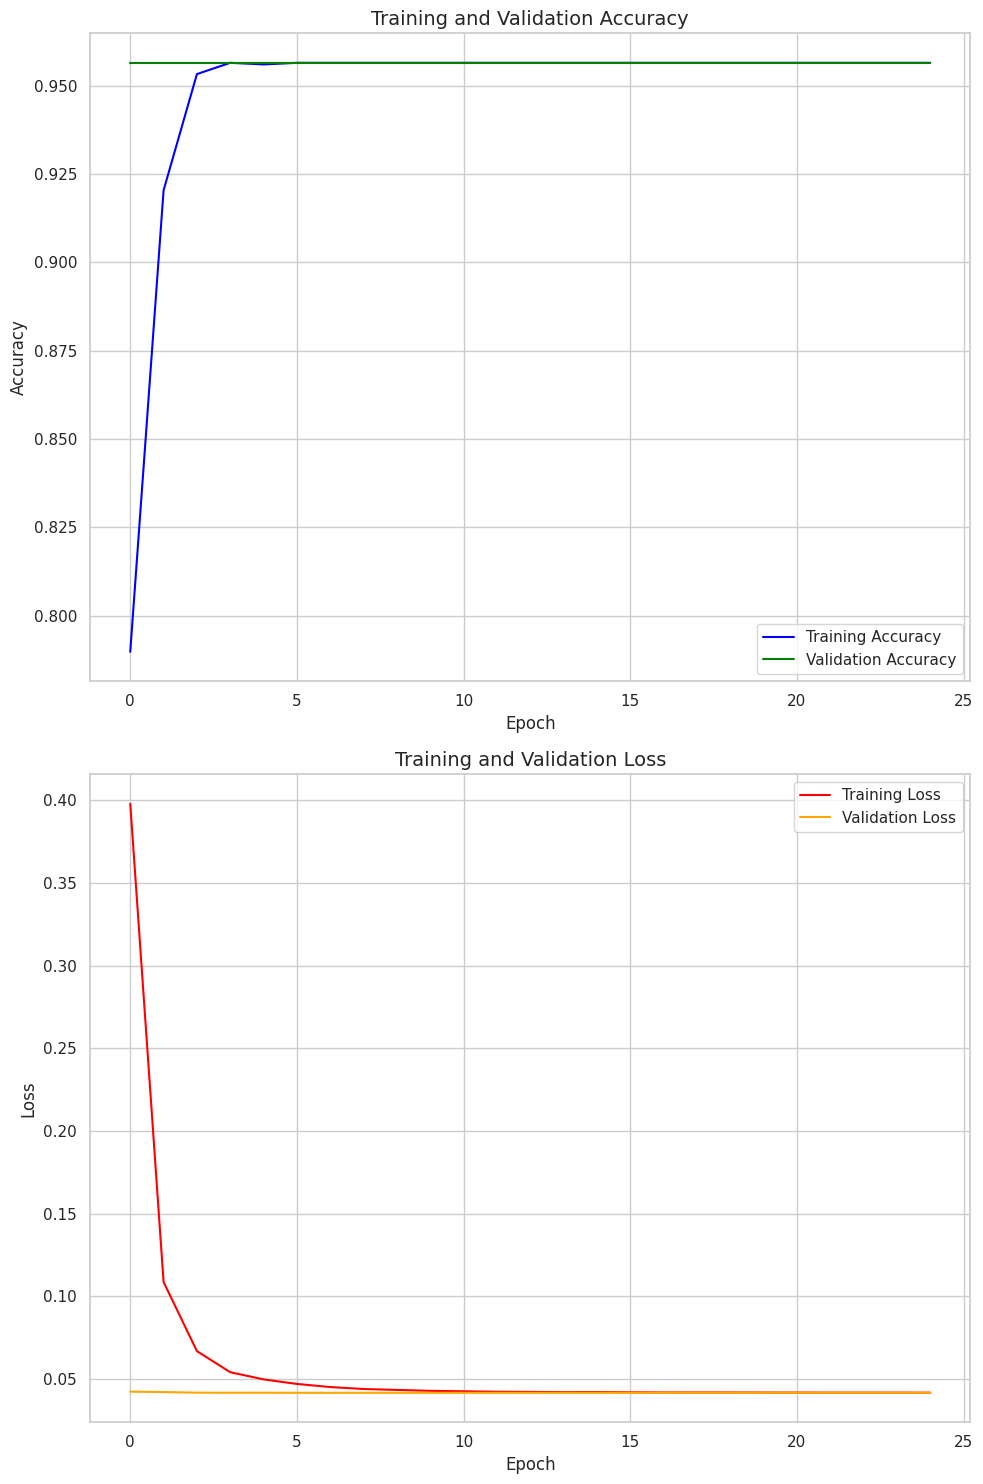

In [ ]:
# Set style
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Plot training & validation accuracy values
sns.lineplot(ax=axes[0], data=history.history['accuracy'], label='Training Accuracy', color='blue')
sns.lineplot(ax=axes[0], data=history.history['val_accuracy'], label='Validation Accuracy', color='green')
axes[0].set_title('Training and Validation Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()

# Plot training & validation loss values
sns.lineplot(ax=axes[1], data=history.history['loss'], label='Training Loss', color='red')
sns.lineplot(ax=axes[1], data=history.history['val_loss'], label='Validation Loss', color='orange')
axes[1].set_title('Training and Validation Loss', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

## Step 8: Making predictions and evaluating the model

**IMPORTANT**: The test set should not be used for model training. It is only used to evaluate the model's performance. The model has not seen the test set during training.

1. `model.evaluate(X_test, y_test)`: This line of code evaluates the model's performance on the test set. `X_test` and `y_test` are the features and labels of the test set, respectively. The `evaluate` function returns the loss value and metrics values for the model in test mode.

2. `test_loss, test_acc = model.evaluate(X_test, y_test)`: The loss and accuracy values returned by `evaluate` are being unpacked into the variables `test_loss` and `test_acc`.

3. `print('Test accuracy:', test_acc)`: This line of code prints the test accuracy of the model. The test accuracy is the proportion of correct predictions that the model made on the test set.

This code gives you an unbiased evaluation of your model's performance, as the test set is data that the model has not seen during training.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)


63/63 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9565
Test accuracy: 0.9565210342407227
